In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price/car data (1).csv


In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
# Load the dataset

df = pd.read_csv("/kaggle/input/car-price/car data (1).csv")

In [4]:
# Display the first few rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Check the shape (number of rows and columns) of the dataset
df.shape

(301, 9)

In [6]:
# Display information about the dataset (data types, non-null counts, etc.)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Check for missing values in the dataset

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
# Get the column names

df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
# drop Car_Name column
df.drop("Car_Name", axis=1, inplace=True)

In [10]:
df["Car_Age"] = 2025 - df["Year"]
df.drop("Year", axis=1, inplace=True)

In [11]:
# Descriptive statistics of the dataset

df.describe()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,11.372093
std,5.082812,8.642584,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,7.000000
25%,0.900000,1.200000,15000.000000,0.000000,9.000000
50%,3.600000,6.400000,32000.000000,0.000000,11.000000
75%,6.000000,9.900000,48767.000000,0.000000,13.000000
max,35.000000,92.600000,500000.000000,3.000000,22.000000


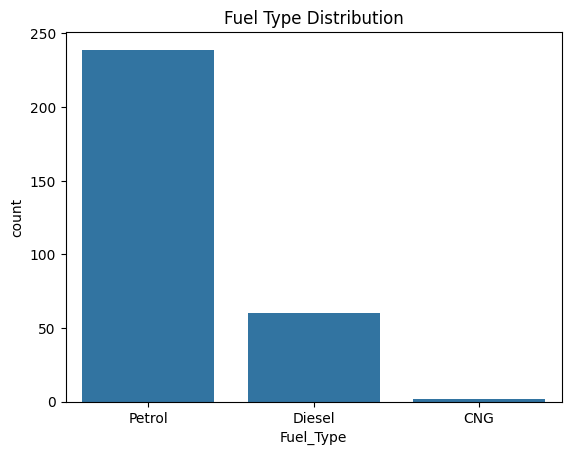

In [12]:
# Visualize the distribution of the 'Fuel_Type' column using a histogram


sns.countplot(x="Fuel_Type", data=df)
plt.title("Fuel Type Distribution")
plt.show()

In [13]:
#One-Hot Encode Categorical Columns
df = pd.get_dummies(
    df,
    columns=["Fuel_Type", "Selling_type", "Transmission"],
    drop_first=True
)

In [14]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [15]:
#Train–Test Split

X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
#Train the Model (Random Forest)

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
#Evaluation

y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2: 0.9594566919773236
MAE: 0.6368655737704919


In [18]:
#Error Analysis

errors = y_test - y_pred
errors.describe()

count    61.000000
mean     -0.091331
std       0.970064
min      -2.535300
25%      -0.497500
50%      -0.006500
75%       0.238500
max       2.742600
Name: Selling_Price, dtype: float64

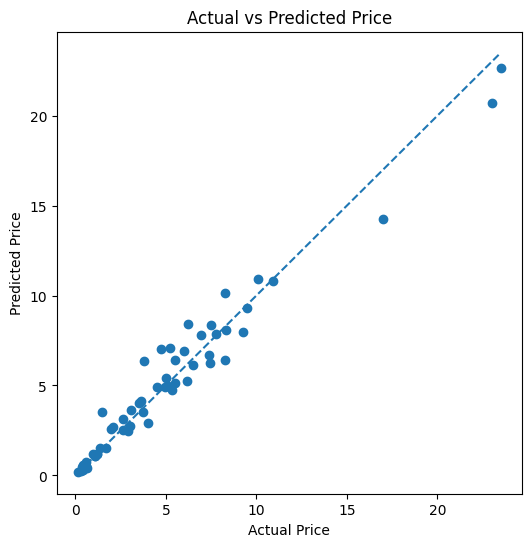

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [20]:
#Feature Importance

import pandas as pd

feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance

Present_Price              0.881166
Car_Age                    0.059495
Driven_kms                 0.040265
Transmission_Manual        0.009646
Fuel_Type_Diesel           0.004339
Fuel_Type_Petrol           0.002564
Selling_type_Individual    0.002155
Owner                      0.000370
dtype: float64

The car price prediction model was successfully built using machine learning techniques. After performing data cleaning, feature engineering, and categorical encoding, a Random Forest Regressor was trained on the dataset.

The final model achieved strong performance with:

R² Score: 0.959

Mean Absolute Error (MAE): 0.63

The model predicts car selling prices with high accuracy and low error. Error analysis and actual vs predicted price visualization confirm that the model generalizes well and captures the relationship between car features and price effectively.

This completes the car price prediction project.

In [21]:
# Define new car features for prediction

new_car_features = [[
    4.75, 43000, 0, 12, 0, 1, 1, 1
]]

In [23]:
# Predict the price for the new car features

new_car_df = pd.DataFrame(
    new_car_features,
    columns=X.columns
)

new_car_price = model.predict(new_car_df)
print("Predicted Price:", new_car_price[0])

Predicted Price: 2.4629999999999983
